#  Support Vector Machine (SVM)

Support Vector Machines (SVMs) are powerful supervised machine learning models used for classification and regression tasks. They are particularly effective in high-dimensional spaces and when the number of dimensions (features) exceeds the number of samples.

Here's an overview of how SVMs work:

1. **Intuition:**
   At its core, SVMs aim to find the optimal hyperplane that best separates different classes in the feature space. For a binary classification problem, this hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors.

2. **Hyperplane:**
   In a two-dimensional space, a hyperplane is simply a line. In higher-dimensional spaces, it becomes a hyperplane. For example, in a 3D space, a hyperplane is a plane, and in a 4D space, it's a three-dimensional object.

3. **Margin:**
   The margin is the distance between the hyperplane and the nearest data point from each class. SVMs aim to maximize this margin, as it leads to better generalization and robustness of the model.

4. **Support Vectors:**
   Support vectors are the data points that are closest to the hyperplane and have the most influence on its position. These are the critical elements that define the decision boundary.

5. **Kernel Trick:**
   SVMs can efficiently handle non-linear decision boundaries by using what's called the "kernel trick." Instead of explicitly mapping the input features into a higher-dimensional space, which could be computationally expensive, SVMs use kernel functions to implicitly compute the dot products in the higher-dimensional space. This allows SVMs to effectively learn non-linear decision boundaries.

6. **Regularization Parameter (C):**
   SVMs have a regularization parameter, denoted as \( C \), which controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of \( C \) leads to a wider margin but may allow for misclassifications, while a larger value of \( C \) leads to a narrower margin but may result in fewer misclassifications.

7. **Types of SVMs:**
   SVMs can be used for both classification and regression tasks:
   - **Support Vector Classifier (SVC):** Used for classification tasks.
   - **Support Vector Regression (SVR):** Used for regression tasks.

In summary, SVMs are versatile machine learning models that excel in both linear and non-linear classification tasks. They find the optimal hyperplane to separate classes by maximizing the margin, with support vectors playing a crucial role in defining the decision boundary. The kernel trick enables SVMs to handle complex decision boundaries efficiently.

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#Importing the dataset
url=(r'https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv')
dataset = pd.read_csv(url)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


These lines extract the independent variables (features) and the dependent variable (target) from the dataset.

   - `X` contains the independent variables, which are selected using `iloc`. It selects all rows (`:`) and the columns at index 2 and 3 (Python uses 0-based indexing, so column 2 refers to the third column and column 3 refers to the fourth column). The `.values` attribute converts the selected data into a NumPy array.
   - `y` contains the dependent variable, which is selected using `iloc` to select all rows and the column at index 4 (fifth column). This column typically represents the target variable or the output that the machine learning model will predict.

In summary, this code reads a dataset from a CSV file hosted on GitHub, selects specific columns to be used as features (`X`) and the target variable (`y`), and stores them as NumPy arrays for further processing in a machine learning task.

In [9]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling 

Feature scaling is a preprocessing technique used in machine learning to standardize or normalize the range of independent features or variables in the data. The goal of feature scaling is to ensure that all features contribute equally to the learning process and prevent certain features from dominating due to their larger scales or ranges.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Fitting SVM to the Training set
this code snippet imports the SVM classifier from scikit-learn, initializes it with specified parameters (linear kernel and random state), and then trains the classifier using the training data (X_train and y_train). The trained classifier can then be used to make predictions on new, unseen data.

Fit() function trains the SVM classifier using the training data. X_train contains the features of the training dataset, and y_train contains the corresponding labels or target values. The fit method adjusts the parameters of the SVM model to minimize the classification error on the training data.

**Linear kernels** are computationally efficient and easy to interpret, making them a popular choice when working with large datasets or when the relationships between features and classes are relatively simple. However, in cases where the classes are not linearly separable, or when a more complex decision boundary is required, other kernel functions like polynomial or radial basis function (RBF) kernels may be more suitable.

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results 
`y_pred` will contain the predicted labels or classes for the test data (`X_test`) based on the learned patterns from the training data. These predictions can then be evaluated against the actual labels (`y_test`) to assess the performance of the SVM classifier.

In [15]:
y_pred = classifier.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


## Making the Confusion Matrix

A confusion matrix is a performance measurement tool for machine learning classification algorithms, which is particularly useful for evaluating the performance of a model on a dataset where the true values are known. It provides a summary of the actual and predicted classifications done by a classification model.

By analyzing the confusion matrix and associated performance metrics, you can gain insights into the strengths and weaknesses of your classification model and make improvements as needed.

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## Visualising the Training set results
This code snippet visualizes the decision boundary created by a Support Vector Machine (SVM) classifier on the training dataset. Let's break it down step by step:

1. **Importing Libraries:**
   ```python
   from matplotlib.colors import ListedColormap
   ```
   This line imports the `ListedColormap` class from the `matplotlib.colors` module. This class is used to create a colormap from a list of colors.

2. **Defining Variables:**
   ```python
   X_set, y_set = X_train, y_train
   ```
   This line assigns the training features (`X_train`) and labels (`y_train`) to the variables `X_set` and `y_set`, respectively.

3. **Creating Mesh Grid:**
   ```python
   X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
   ```
   This code creates a mesh grid of points covering the range of the features. It uses `np.meshgrid()` to generate a grid of points for the two features (`X1` and `X2`). The `arange()` function is used to create arrays of values within the specified range with a step size of 0.01.

4. **Making Predictions:**
   ```python
   plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
   ```
   Here, predictions are made for each point in the mesh grid using the SVM classifier (`classifier`). The `predict()` method is applied to the flattened mesh grid (`X1.ravel()` and `X2.ravel()`) to get the predicted class labels. The result is reshaped to match the shape of the mesh grid. `contourf()` function is then used to create filled contour plots based on the predictions.

5. **Plotting Data Points:**
   ```python
   for i, j in enumerate(np.unique(y_set)):
       plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = ListedColormap(('red', 'green'))(i), label = j)
   ```
   This loop iterates over unique class labels (`j`) in the training set and plots the data points for each class. It uses different colors (red and green) to distinguish between the classes.

6. **Plot Customization:**
   ```python
   plt.xlim(X1.min(), X1.max())
   plt.ylim(X2.min(), X2.max())
   plt.title('SVM (Training set)')
   plt.xlabel('Age')
   plt.ylabel('Estimated Salary')
   plt.legend()
   plt.show()
   ```
   These lines set the limits of the plot, add a title, and label the axes. Finally, it displays the plot with `plt.show()`.

In summary, this code generates a visualization of the decision boundary created by the SVM classifier on the training dataset, along with the actual data points. It helps to understand how the SVM classifier separates the classes in the feature space.


/var/folders/60/b2krjn1s6jbcv1dd1wbzt2wm0000gp/T/ipykernel_69698/4201665834.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


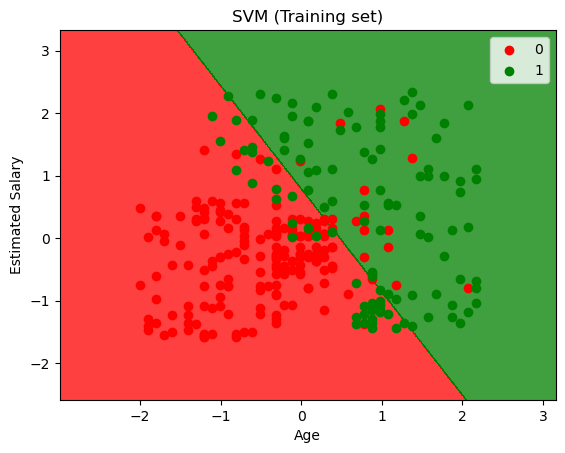

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results 

This code snippet visualizes the decision boundary created by a Support Vector Machine (SVM) classifier on the test dataset. Let's break it down step by step:

1. **Importing Libraries:**
   ```python
   from matplotlib.colors import ListedColormap
   ```
   This line imports the `ListedColormap` class from the `matplotlib.colors` module. This class is used to create a colormap from a list of colors.

2. **Defining Variables:**
   ```python
   X_set, y_set = X_test, y_test
   ```
   This line assigns the test features (`X_test`) and labels (`y_test`) to the variables `X_set` and `y_set`, respectively.

3. **Creating Mesh Grid:**
   ```python
   X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
   ```
   This code creates a mesh grid of points covering the range of the features. It uses `np.meshgrid()` to generate a grid of points for the two features (`X1` and `X2`). The `arange()` function is used to create arrays of values within the specified range with a step size of 0.01.

4. **Making Predictions:**
   ```python
   plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
   ```
   Here, predictions are made for each point in the mesh grid using the SVM classifier (`classifier`). The `predict()` method is applied to the flattened mesh grid (`X1.ravel()` and `X2.ravel()`) to get the predicted class labels. The result is reshaped to match the shape of the mesh grid. `contourf()` function is then used to create filled contour plots based on the predictions.

5. **Plotting Data Points:**
   ```python
   for i, j in enumerate(np.unique(y_set)):
       plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = ListedColormap(('red', 'green'))(i), label = j)
   ```
   This loop iterates over unique class labels (`j`) in the test set and plots the data points for each class. It uses different colors (red and green) to distinguish between the classes.

6. **Plot Customization:**
   ```python
   plt.xlim(X1.min(), X1.max())
   plt.ylim(X2.min(), X2.max())
   plt.title('SVM (Test set)')
   plt.xlabel('Age')
   plt.ylabel('Estimated Salary')
   plt.legend()
   plt.show()
   ```
   These lines set the limits of the plot, add a title, and label the axes. Finally, it displays the plot with `plt.show()`.

In summary, this code generates a visualization of the decision boundary created by the SVM classifier on the test dataset, along with the actual data points. It helps to understand how well the SVM classifier generalizes to unseen data and separates the classes in the feature space.

/var/folders/60/b2krjn1s6jbcv1dd1wbzt2wm0000gp/T/ipykernel_69698/2113774946.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


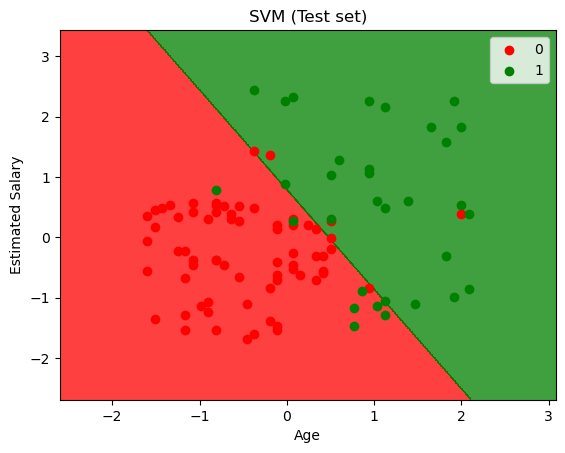

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()